In [2]:
pip install -r requirements.txt


  Using cached gunicorn-20.1.0-py3-none-any.whl (79 kB)
  Using cached flask_sqlalchemy-3.0.5-py3-none-any.whl (24 kB)
  Using cached Flask_Login-0.6.2-py3-none-any.whl (17 kB)
  Using cached pyOpenSSL-23.2.0-py3-none-any.whl (59 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.5 MB/s eta 0:00:0000:0100:01
  Using cached cryptography-41.0.1-cp37-abi3-macosx_10_12_universal2.whl (5.3 MB)
  Using cached charset_normalizer-3.1.0-cp310-cp310-macosx_11_0_arm64.whl (123 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-2.0.3-py3-none-any.whl (123 kB)
  Using cached certifi-2023.5.7-py3-none-any.whl (156 kB)
  Using cached cffi-1.15.1-cp310-cp310-macosx_11_0_arm64.whl (174 kB)
  Using cached pycparser-2.21-py2.py3-none-any.whl (118 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

  Using cached matplotlib-3.7.1-cp310-cp310-macosx_11_0_arm64.whl (7.3 MB)
  Using cached contourpy-1.1.0-cp310-cp310-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp310-cp310-macosx_10_9_universal2.whl (2.6 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 6.0 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create engine
engine = create_engine('sqlite:///movie-night.db')

# Get connection
connection = engine.connect()

In [9]:
# Execute select query to fetch popularity from Actor table
actor_popularity_query = text("SELECT popularity FROM Actor")
actor_popularity_result = connection.execute(actor_popularity_query)
actor_popularity = [row[0] for row in actor_popularity_result]


In [10]:
# Execute select query to fetch popularity from Director table
director_popularity_query = text("SELECT popularity FROM Director")
director_popularity_result = connection.execute(director_popularity_query)
director_popularity = [row[0] for row in director_popularity_result]

In [39]:
actor_popularity_df = pd.DataFrame(actor_popularity, columns=['popularity'])
director_popularity_df = pd.DataFrame(director_popularity, columns=['popularity'])

In [42]:
actor_popularity_df

,popularity
0,0.60
1,0.60
2,0.60
3,0.60
4,0.60
...,...
1552222,0.60
1552223,0.60
1552224,1.38
1552225,0.60


In [43]:
director_popularity_df

,popularity
0,0.600
1,0.656
2,0.600
3,0.600
4,0.600
...,...
253470,0.600
253471,0.600
253472,0.600
253473,0.600


In [50]:
#Actor Mean
print("Actor Mean")
actor_popularity_df.mean()

Actor Mean


popularity    0.831248
dtype: float64

In [51]:
#Director Mean
print("Director Mean")
director_popularity_df.mean()

Director Mean


popularity    0.677333
dtype: float64

In [52]:
#Actor Standard Deviation
print("Actor Standard Deviation")
actor_popularity_df.std()

Actor Standard Deviation


popularity    1.389514
dtype: float64

In [53]:
# Director Standard Deviation
print("Director Standard Deviation")
director_popularity_df.std()

Director Standard Deviation


popularity    0.466521
dtype: float64

In [54]:
#Actor Variance
print("Actor Variance")
actor_popularity_df.var()

Actor Variance


popularity    1.930748
dtype: float64

In [55]:
#Director Variance
print("Director Variance")
director_popularity_df.var()

Director Variance


popularity    0.217642
dtype: float64

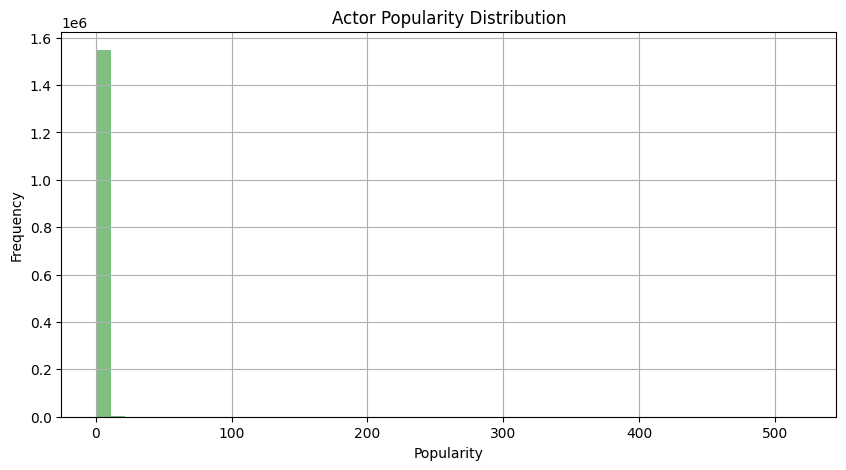

In [40]:
plt.figure(figsize=(10, 5))
plt.hist(actor_popularity_df['popularity'], bins=50, alpha=0.5, color='green')
plt.title('Actor Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
#plt.savefig(filename)
#plt.close() # Close the plot
plt.show()
plt.close()

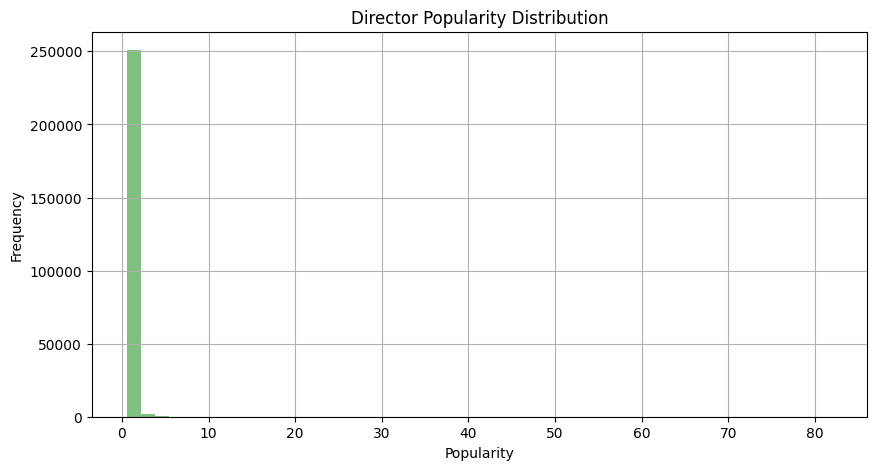

In [38]:
plt.figure(figsize=(10, 5))
plt.hist(director_popularity_df['popularity'], bins=50, alpha=0.5, color='green')
plt.title('Director Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
#plt.savefig(filename)
#plt.close() # Close the plot
plt.show()
plt.close()